<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Bayesian Regression with `pymc3`

_Authors: Kiefer Katovich (SF)_

---

### Learning Objectives
- Describe how to use pymc3 to fit Bayesian estimation models
- Plot and interpret the results of pymc3 models
- Construct a Bayesian regression using pymc3
- Use the patsy-style formula syntax to build a pymc3 regression


### Lesson Guide
- [Introduction](#intro)
- [Enter `pymc3`](#pymc3)
- [Load the Starcraft data](#data)
- [Alternative to t-testing using Bayesian estimation](#ttest)
    - [Get the APM values for 19 and 26 year olds](#load)
    - [Perform a Frequentist t-test of the mean APM difference between groups.](#freq-ttest)
    - [Set up a Bayesian model with priors on the mean APMs](#priors)
    - [Construct the prior distributions on the means](#construct-priors)
    - [Construct the prior distributions on the standard deviations](#std-priors)
    - [Set up the APM distributions for the two groups](#apm-dists)
    - [Tracking additional metrics](#metrics)
    - [Fitting the `pymc3` model](#fit)
    - [Plotting the posteriors and metric distributions](#plotting)
- [Bayesian regression with `pymc3`](#reg)
    - [Set up variables to perform an age vs. APM regression](#age-vs-apm)
    - [Set up the Bayesian regression model](#bayes-model)
    - [Plot the posteriors using `pm.traceplot`](#traceplot)
- [Using a patsy-style formula to specify a `pymc3` model](#formula)

<a id='intro'></a>
## Introduction
---

With `pymc3` we can perform the Bayesian counterparts of Frequentist models we have studied. In this codealong lesson we will start incrementally: first by repeating the Beta-Binomial model from yesterday, then replacing the Frequentist t-test with Bayesian estimation and finally performing a Bayesian regression with a single predictor.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='pymc3'></a>
## Enter `pymc3`
---

The `pymc3` is the Bayesian modeling package we will be using. It is a powerful and flexible architecture for performing a huge variety of Bayesian analyses. We will only be scratching the surface today.

> **Note:** There is also `pymc` (or pymc2) which has a different syntax. pymc2 is (in my opinion) harder for beginners to Bayesian statistics to understand; pymc3 bridges the gap better for those who are more familiar with constructing models using Frequentist style models/syntax.

Let's start with the website subscription example.  Say from previous experience, I observed 345 subscriptions out of a total of 1000 visits.  My new data shows 40 subscriptions out of 100 visits.

In [2]:
# Estimate p
n_success_prior = 345
n_failure_prior = 1000 - 345

n = 100
k = 40
mle_p = k/n
mle_p

0.4

In [3]:
# Prior Beta(alpha, beta)
alpha_prior = n_success_prior + 1
beta_prior = n_failure_prior + 1

# Posterior Beta(alpha, beta)
alpha_post = k + alpha_prior
beta_post = n - k + beta_prior

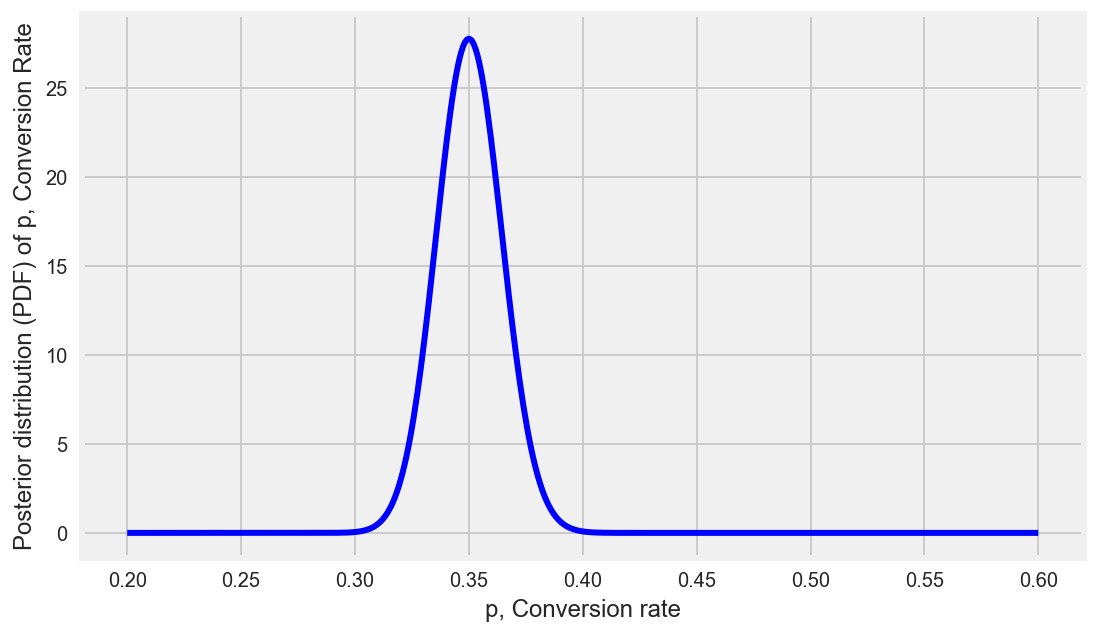

In [4]:
# MAP (max a posteriori) @ 35%

pvals = np.linspace(0.2, 0.6, 500)    
beta_dist = stats.beta(alpha_post, beta_post)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pvals, beta_dist.pdf(pvals), 'b', lw=3, label='Posterior')
ax.set_xlabel('p, Conversion rate')
ax.set_ylabel('Posterior distribution (PDF) of p, Conversion Rate')
plt.show();

In [5]:
#P(p | n,k) = (P(n,k | p) * P(p)) / marginal
with pm.Model() as model:
    # Prior
    p = pm.Beta('p', alpha=alpha_prior, beta=beta_prior)
    
    # Likelihood
    y = pm.Binomial('y', p=p, n=n, observed=k)
    
    #Sample from the posterior with NUTS (no U-turn sampling)
    trace = pm.sample(2000, tune=1000, njobs=1)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '2835' (I am process '3536')
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p_logodds__]
100%|██████████| 3000/3000 [00:03<00:00, 957.42it/s]


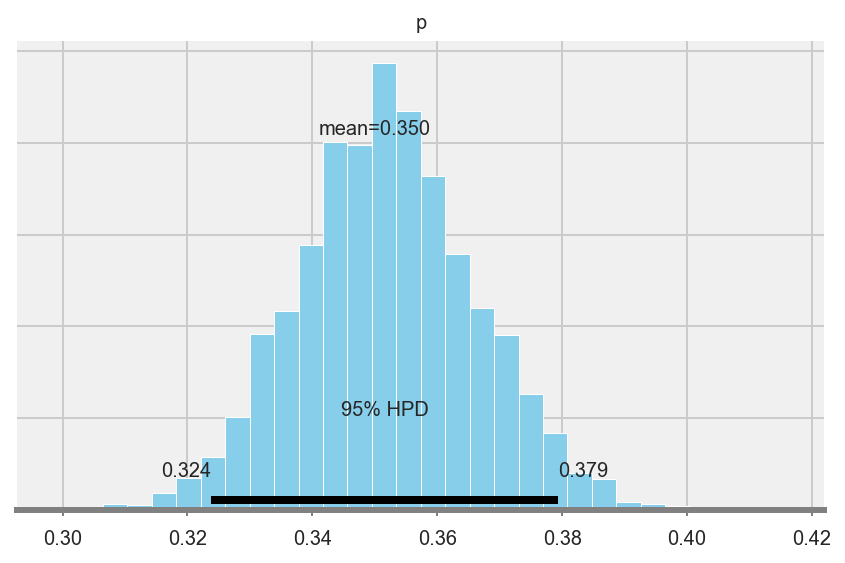

In [6]:
pm.plot_posterior(trace, varnames=['p'], color='#87ceeb');
# for burn in, pass a slice
# pm.plot_posterior(trace[250:], varnames=['p'], color='#87ceeb');

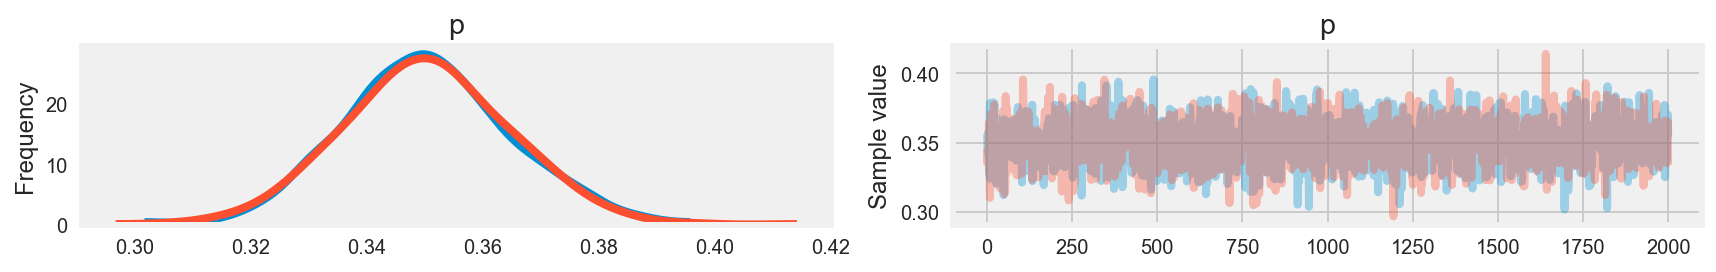

In [8]:
pm.traceplot(trace);

In [ ]:
# Tune: specifically for NUTS, an algorithmic parameter
# Burn-in: A property of Monte Carlo, always present

<a id='data'></a>
### Load the Starcraft dataset
---

You may be familiar with this dataset. It has records of different player statistics in competitive Starcraft. There are a variety of columns that are described in detail within the `description.txt` file contained inside the `./datasets/` folder.

For the examples in this lab, I will be using APM (actions per minute) and Age, but I in the following lab you will get the chance to look at other variables as well.

In [9]:
star = pd.read_csv('./datasets/SkillCraft1_Dataset.csv')

In [13]:
# A:
s = star[star['Age'] != '?'].copy()
s['Age'] = s['Age'].map(lambda x: float(x))

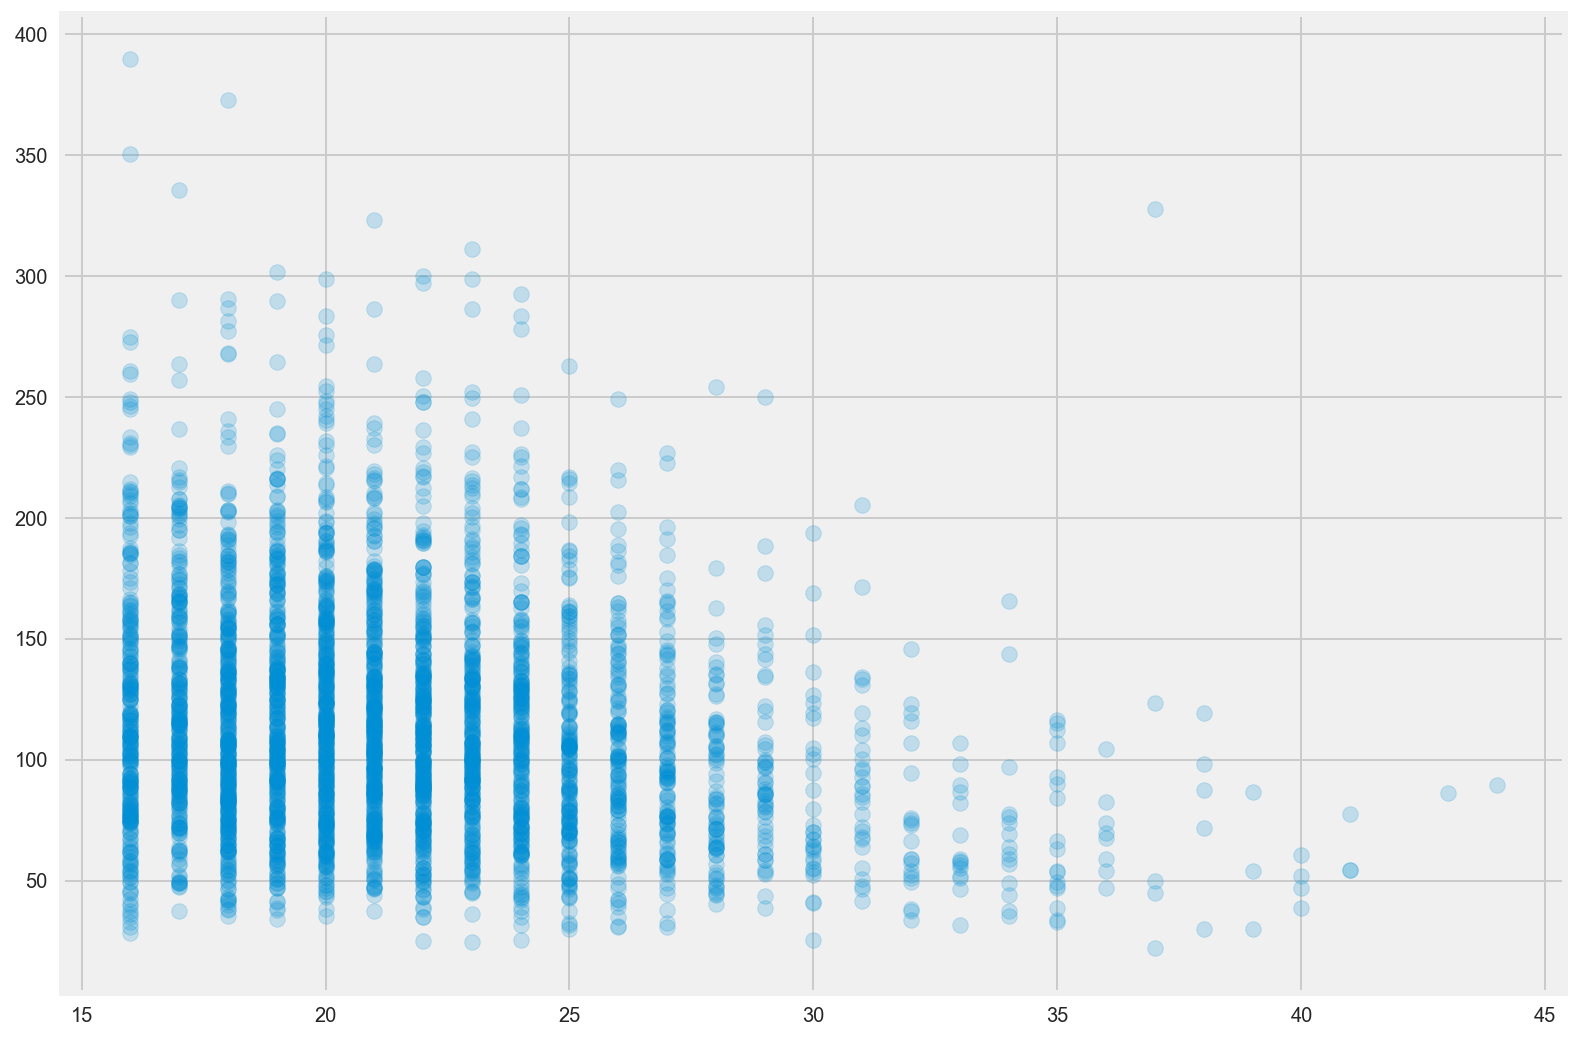

In [15]:
fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(s['Age'].values, s['APM'].values, s=60, alpha=.2);

<a id='reg'></a>
## Bayesian regression with `pymc3`
---

With `pymc3`, the sky is the limit. Let's move on to something a little more complicated: Bayesian regressions.

> *Note: [This example is modeled after the generalized linear model (GLM) instructions in the pymc3 documentation.](http://pymc-devs.github.io/pymc3/notebooks/GLM-linear.html)*

What are the benefits to taking a Bayesian approach to regression modeling? Just like in our estimation of means per group, when we perform regression with Bayesian statistics we will get out posterior *distributions* on our intercept and coefficients. 

This is a big difference from the point estimates coming out of the Frequentist regression: not only do we have the most likely value for the coefficients (the MAP estimates), we can see the range of possibilities given our prior and observed data. 

---

<a id='age-vs-apm'></a>
### Set up variables to perform an age vs. APM regression

In [ ]:
# A:


**Plot out the age vs. apm values.**

In [ ]:
# A:


<a id='bayes-model'></a>
### Setting up the Bayesian regression model

Remember regression?

## $$y = \beta_0 + \beta_1 x + \epsilon$$

From a statistical perspective, $\beta_0$, $\beta_1$ and $\epsilon$ are random variables.

For the sake of simplicity, let's assume that they are _uniform_ random variables.  This will be our prior belief, that will be updated based on data!

## $$\beta_0 \sim Uniform(-200, 200)$$

## $$\beta_1 \sim Uniform(-10000, 10000)$$

## $$\epsilon \sim Uniform(0.0001, 1000)$$


---

Like before, we will construct our model with the `with pm.Model() ...` syntax. 

We have three prior distributions in this case that will be updated to posteriors given our observed data:

1. `apm_std`: which will be our prior belief about the standard deviation of APM values. In this case I am setting it to be uniform (uninformative) between `0.0001`, and `1000.`
- `intercept`: a uniform distribution for the range of possible values of the intercept.
- `age_beta`: a uniform distribution for the range of possible values of the age coefficient.

We set up a `likelihood` distribution that is also normal, representing the distribution of the data (APM) given our predictor. The mean of the likelihood is defined like a regression formula: our intercept distribution plus the age values times our age beta distribution. We give the `apm_std` uniform prior as the standard deviation. Lastly, the observed values, or data, will be the APM values.

What will happen here as we sample from the posterior is that more likely values (as defined by the `mu=` regression-style definition) will be "visited" more often. The intercept and age_beta distributions will have more values visited in places where they result in higher likelihood estimates.

`pm.find_MAP()` tries to find good starting values for our sampling procedure so that we don't have to run it for as many iterations to get a good posterior representation.

In [16]:
# A:
apm_age = s[['APM', 'Age']]

In [17]:
with pm.Model() as reg:
    # Priors
    apm_std = pm.Uniform('apm_std', lower=0.0001, upper=1000.)
    intercept = pm.Uniform('intercept', lower=-10000, upper=10000)
    age_beta = pm.Uniform('age_beta', lower=-200, upper=200)
    
    #Likelihood
    # P(y | intercept, age_beta, apm_std, X(which are the age inputs))
    mu = intercept + age_beta * apm_age['Age'].values
    expected_apm = pm.Normal('y_mean', mu=mu, sd=apm_std, observed=apm_age['APM'].values)

In [18]:
with reg:
    step = pm.NUTS() # default
    start = pm.find_MAP()
    trace = pm.sample(4000, step=step, start=start, tune=1000)

logp = -17,623, ||grad|| = 0.93166: 100%|██████████| 32/32 [00:00<00:00, 213.11it/s]     
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [age_beta_interval__, intercept_interval__, apm_std_interval__]
100%|██████████| 5000/5000 [00:50<00:00, 99.11it/s]


In [20]:
np.mean(trace['age_beta']), np.mean(trace['intercept'])

(-2.4103984767300033, 166.73919745271309)

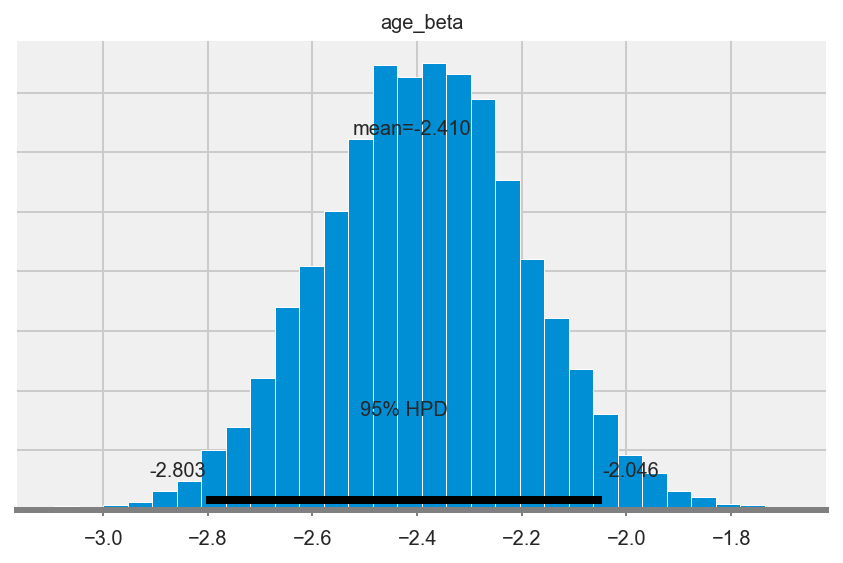

In [25]:
pm.plot_posterior(trace, varnames=['age_beta']);

In [21]:
# Best estimate (bestimate?)

beta_0_mean = np.mean(trace['intercept'])
beta_1_mean = np.mean(trace['age_beta'])

beta_0_low = np.percentile(trace['intercept'], 0.025)
beta_1_low = np.percentile(trace['age_beta'], 0.025)

beta_0_high = np.percentile(trace['intercept'], 0.975)
beta_1_high = np.percentile(trace['age_beta'], 0.975)

x = apm_age.Age.values
y = apm_age.APM.values

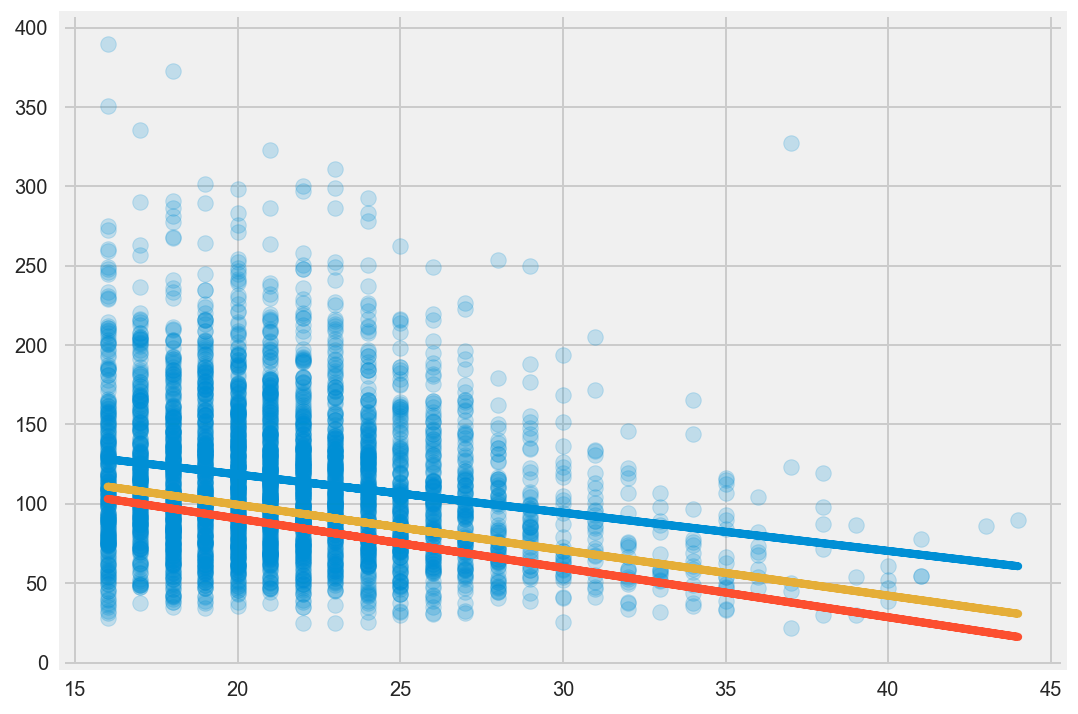

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x,y, s=60, alpha=0.2)
ax.plot(x, beta_0_mean + beta_1_mean*x)
ax.plot(x, beta_0_low + beta_1_low*x)
ax.plot(x, beta_0_high + beta_1_high*x)
plt.show();

<a id='traceplot'></a>
### Plot the posteriors using `pm.traceplot`

The traceplot function can also plot our posteriors, as well as a graph of the actual traces for each distribution. These traces represent the points visited by the sampling algorithm.

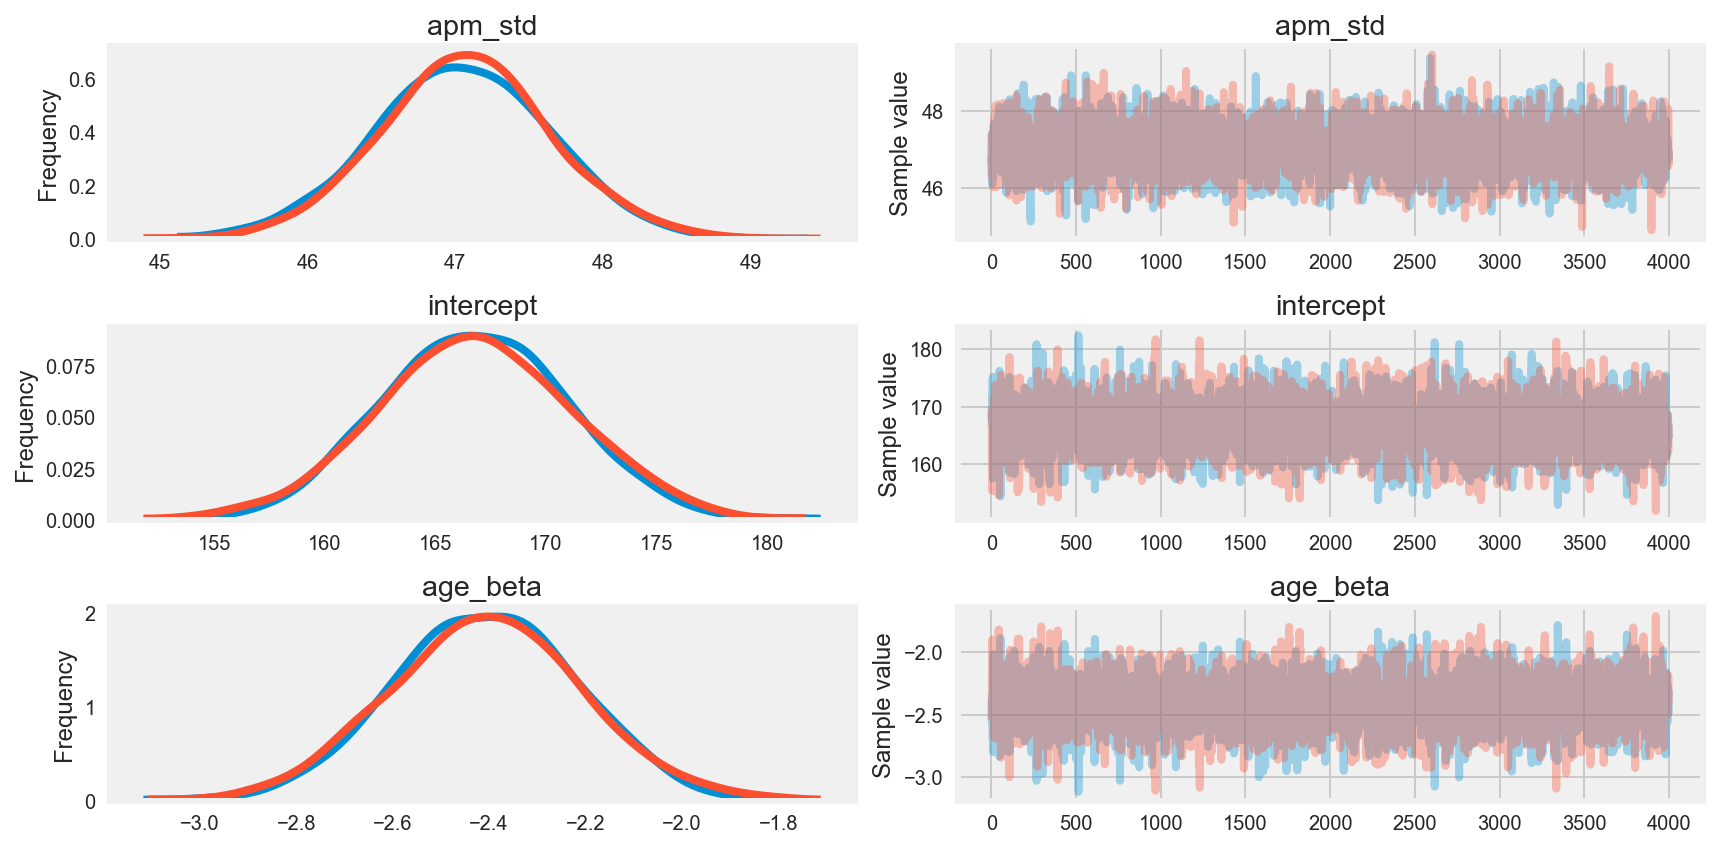

In [27]:
# A:
pm.traceplot(trace);

<a id='formula'></a>
## Setting up a model using a patsy-style formula
---

`pymc3` also provides a convenience function `pm.glm.glm(...` which takes a patsy-style formula definition and the dataframe, then automatically constructs the distributions required to solve the Bayesian regression. Pretty nice.

In [29]:
beta_0_mean = np.mean(trace['intercept'])
beta_1_mean = np.mean(trace['age_beta'])

beta_0_low = np.percentile(trace['intercept'], 2.5)
beta_1_low = np.percentile(trace['age_beta'], 2.5)

beta_0_high = np.percentile(trace['intercept'], 97.5)
beta_1_high = np.percentile(trace['age_beta'], 97.5)

x = apm_age.Age.values
y = apm_age.APM.values

In [32]:
# A:
with pm.Model() as reg2:
    pm.glm.GLM.from_formula('APM ~ Age', apm_age)
    start = pm.find_MAP()
    trace = pm.sample(4000, tune=500, start=start)

logp = -17,613, ||grad|| = 0.011422: 100%|██████████| 43/43 [00:00<00:00, 673.63it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, Age, Intercept]
100%|██████████| 4500/4500 [00:59<00:00, 75.76it/s]


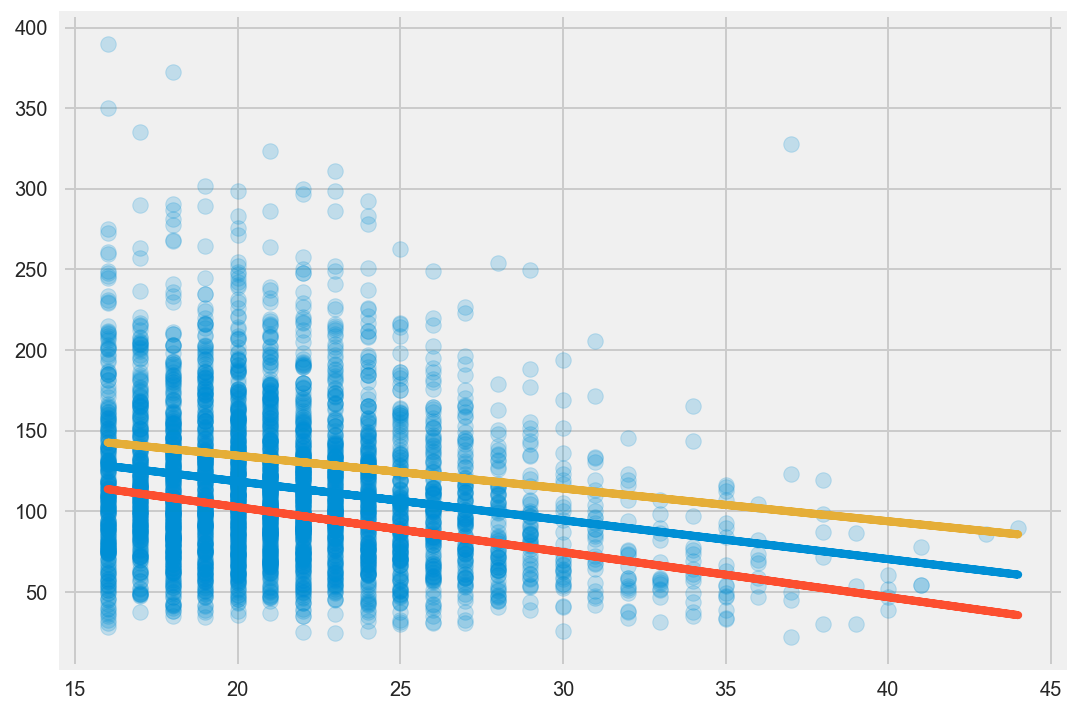

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x,y, s=60, alpha=0.2)
ax.plot(x, beta_0_mean + beta_1_mean*x)
ax.plot(x, beta_0_low + beta_1_low*x)
ax.plot(x, beta_0_high + beta_1_high*x)
plt.show();

**Lastly, you can plot out different possible regression lines with `pm.glm.plot_posterior_predictive`.**

This function takes:

- the trace (MCMC samples)
- the number of samples you want to draw out and plot
- an `lm=` argument that will be a function defining how the regression line will be fit using an x value and the sample
- an `eval=` argument that will be the x-values `lm` is evaluated over

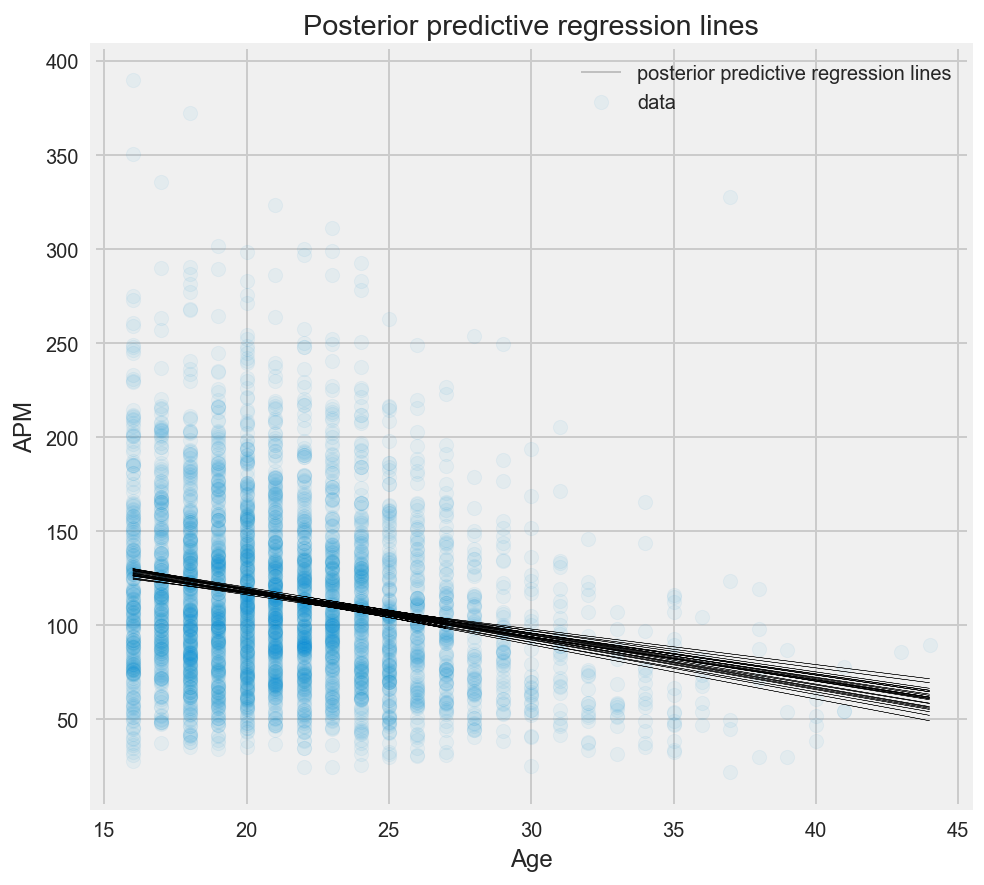

In [34]:
# A:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(apm_age.Age.values, apm_age.APM.values,
           s=50, alpha=0.05, label='data')

pm.plot_posterior_predictive_glm(trace, samples=25, 
                                 lm=lambda x, sample: sample['Intercept'] + sample['Age']*x,
                                 eval=apm_age.Age.values,
                                 label='posterior predictive regression lines')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('Age')
plt.ylabel('APM')

plt.show();

In [ ]:
def balanced(usrinput):
    p = 0
    b = 0
    c = 0
    l = len(usrinput - 1)
    # Check parens
    for i in range(l):
        if usrinput[i] == '(':
            p += 1
        elif usrinput[i] == ')':
            p -= 1
        if p < 0:
            return(False)
    if p > 0:
        return(False)
    # Check brackets
    for i in range(l):
        if usrinput[i] == '[':
            b += 1
        elif usrinput[i] == ']':
            b -= 1
        if b < 0:
            return(False)
    if b > 0:
        return(False)
    # Check curlies
    for i in range(l):
        if usrinput[i] == '{':
            c += 1
        elif usrinput[i] == '}':
            c -= 1
        if c < 0:
            return(False)
    if c > 0:
        return(False)
    # All good!
    return(True)